In [4]:
%pip install tensorflow
%pip install keras


   ---------------------------------------- 0.0/385.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/385.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/385.0 MB 1.7 MB/s eta 0:03:54
   ---------------------------------------- 0.1/385.0 MB 1.7 MB/s eta 0:03:54
   ---------------------------------------- 0.2/385.0 MB 1.3 MB/s eta 0:04:55
   ---------------------------------------- 0.2/385.0 MB 1.3 MB/s eta 0:04:55
   ---------------------------------------- 0.2/385.0 MB 1.3 MB/s eta 0:04:55
   ---------------------------------------- 0.2/385.0 MB 1.3 MB/s eta 0:04:55
   ---------------------------------------- 0.2/385.0 MB 692.4 kB/s eta 0:09:16
   ---------------------------------------- 0.2/385.0 MB 692.4 kB/s eta 0:09:16
   ---------------------------------------- 0.3/385.0 MB 893.0 kB/s eta 0:07:11
   ---------------------------------------- 0.4/385.0 MB 933.2 kB/s eta 0:06:53
   ---------------------------------------- 0.4/385.0 MB 984.2 kB/s e


[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


   --- ------------------------------------ 38.3/385.0 MB 3.2 MB/s eta 0:01:50
   --- ------------------------------------ 38.4/385.0 MB 3.1 MB/s eta 0:01:51
   --- ------------------------------------ 38.4/385.0 MB 3.1 MB/s eta 0:01:51
   --- ------------------------------------ 38.4/385.0 MB 3.1 MB/s eta 0:01:51
   --- ------------------------------------ 38.5/385.0 MB 3.0 MB/s eta 0:01:54
   --- ------------------------------------ 38.5/385.0 MB 3.0 MB/s eta 0:01:54
   ---- ----------------------------------- 38.5/385.0 MB 3.0 MB/s eta 0:01:56
   ---- ----------------------------------- 38.5/385.0 MB 3.0 MB/s eta 0:01:57
   ---- ----------------------------------- 38.6/385.0 MB 2.9 MB/s eta 0:01:58
   ---- ----------------------------------- 38.7/385.0 MB 2.9 MB/s eta 0:01:59
   ---- ----------------------------------- 38.8/385.0 MB 2.9 MB/s eta 0:02:01
   ---- ----------------------------------- 38.9/385.0 MB 2.9 MB/s eta 0:02:01
   ---- ----------------------------------- 39.0/385


[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import keras
from keras.datasets import mnist

# Загрузка данных
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Проверка формы загруженных данных
print(x_train.shape)  # (60000, 28, 28)
print(x_test.shape)   # (10000, 28, 28)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [7]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

model1 = Sequential()
model1.add(Flatten(input_shape=(28, 28)))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(10, activation='softmax'))

c:\Users\Дом\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model2 = Sequential()
model2.add(Flatten(input_shape=(28, 28)))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(10, activation='softmax'))

In [10]:
model3 = Sequential()
model3.add(Flatten(input_shape=(28, 28)))
model3.add(Dense(256, activation='relu'))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(10, activation='softmax'))

In [11]:
for model in [model1, model2, model3]:
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [22]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5)

history1 = model1.fit(x_train, y_train, validation_split=0.2, epochs=20, batch_size=32, callbacks=[early_stopping])
history2 = model2.fit(x_train, y_train, validation_split=0.2, epochs=20, batch_size=32, callbacks=[early_stopping])
history3 = model3.fit(x_train, y_train, validation_split=0.2, epochs=20, batch_size=32, callbacks=[early_stopping])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9965 - loss: 0.0120 - val_accuracy: 0.9780 - val_loss: 0.0896
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9975 - loss: 0.0087 - val_accuracy: 0.9778 - val_loss: 0.0859
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9985 - loss: 0.0061 - val_accuracy: 0.9756 - val_loss: 0.1026
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9983 - loss: 0.0065 - val_accuracy: 0.9758 - val_loss: 0.1030
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9984 - loss: 0.0059 - val_accuracy: 0.9791 - val_loss: 0.0959
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9984 - loss: 0.0053 - val_accuracy: 0.9769 - val_loss: 0.1038
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9992 - loss: 0.0035 - val_accuracy: 0.9789 - val_loss: 0.0942
Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9816 - loss: 0.0582 - 

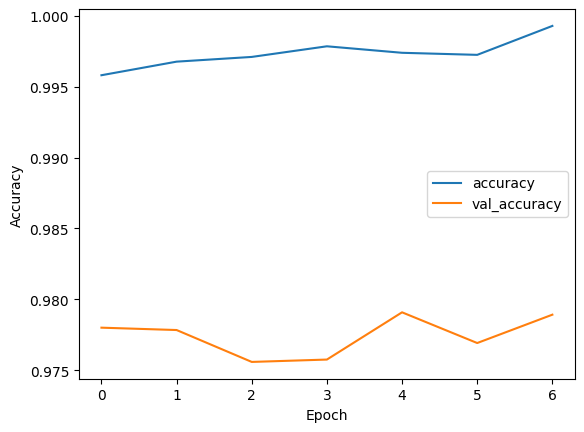

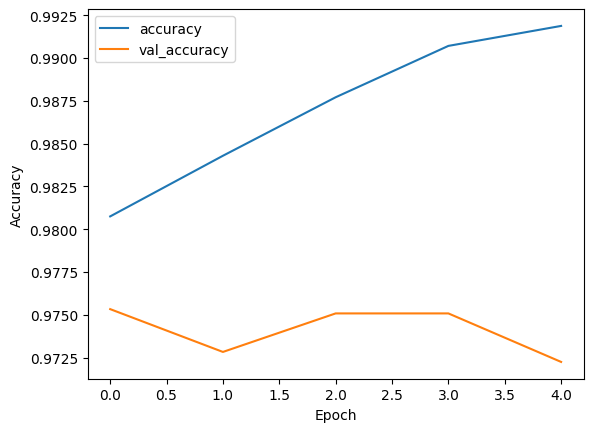

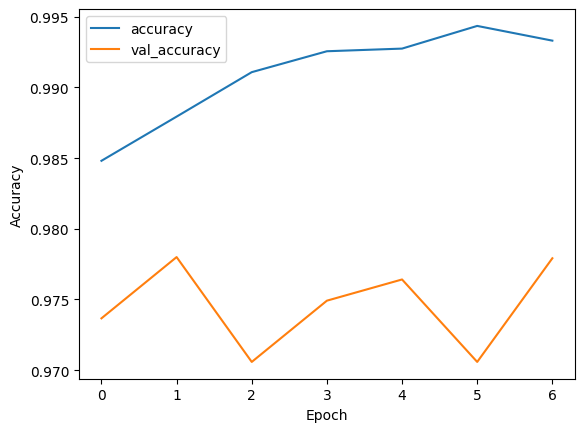

In [23]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_history(history1)
plot_history(history2)
plot_history(history3)

In [24]:
test_loss1, test_acc1 = model1.evaluate(x_test, y_test)
test_loss2, test_acc2 = model2.evaluate(x_test, y_test)
test_loss3, test_acc3 = model3.evaluate(x_test, y_test)

print(f'Model 1 accuracy: {test_acc1}')
print(f'Model 2 accuracy: {test_acc2}')
print(f'Model 3 accuracy: {test_acc3}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9757 - loss: 0.1111
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9664 - loss: 0.1206
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9761 - loss: 0.0961
Model 1 accuracy: 0.9797000288963318
Model 2 accuracy: 0.972000002861023
Model 3 accuracy: 0.9799000024795532


In [25]:
from sklearn.metrics import roc_auc_score
y_pred1 = model1.predict(x_test)
y_pred_classes1 = np.argmax(y_pred1, axis=1)
auc1 = roc_auc_score(y_test, y_pred1, multi_class='ovr')
y_pred2 = model2.predict(x_test)
y_pred_classes2 = np.argmax(y_pred2, axis=1)
auc2 = roc_auc_score(y_test, y_pred2, multi_class='ovr')
y_pred3 = model3.predict(x_test)
y_pred_classes3 = np.argmax(y_pred3, axis=1)
auc3 = roc_auc_score(y_test, y_pred3, multi_class='ovr')

print(f'Model 1 AUC: {auc1}')
print(f'Model 2 AUC: {auc2}')
print(f'Model 3 AUC: {auc3}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Model 1 AUC: 0.9996020739704747
Model 2 AUC: 0.9994669788829489
Model 3 AUC: 0.9997057975766881


In [26]:
model1.save('model1.h5')
model2.save('model2.h5')
model3.save('model3.h5')

# Загрузка модели
from keras.models import load_model
loaded_model1 = load_model('model1.h5')
loaded_model2 = load_model('model2.h5')
loaded_model3 = load_model('model3.h5')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


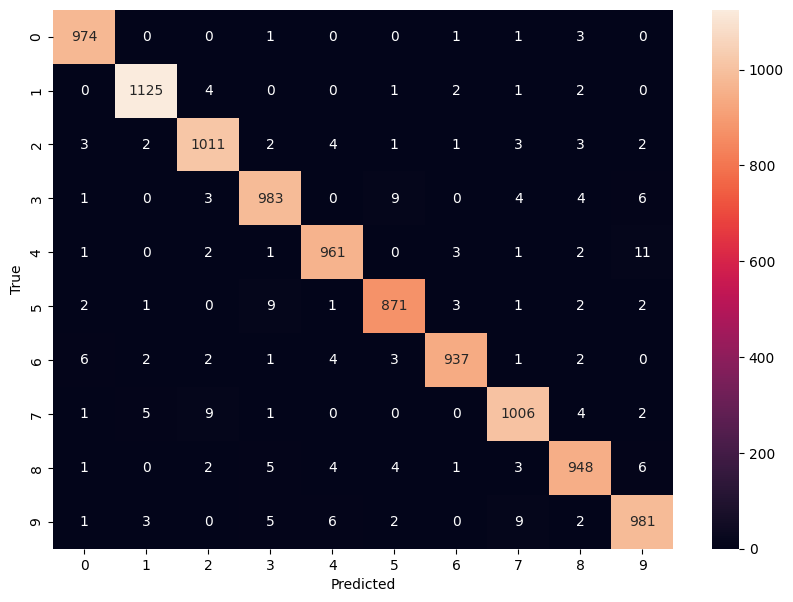

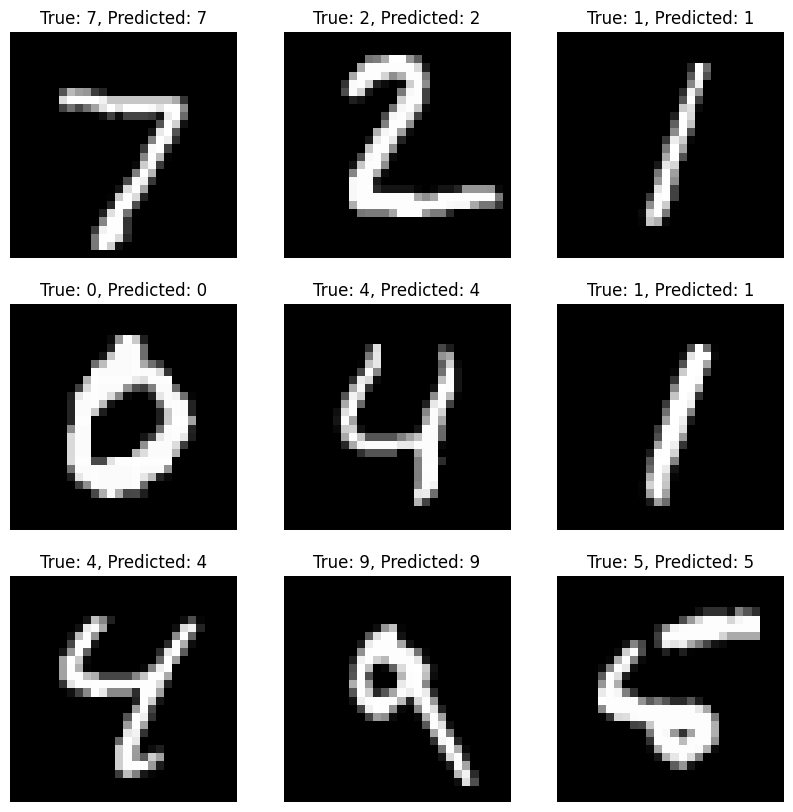

In [27]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Предсказания
predictions = loaded_model1.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

# Матрица ошибок
cm = confusion_matrix(y_test, predicted_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Визуализация изображений
def plot_images(images, labels, predictions):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f'True: {labels[i]}, Predicted: {predictions[i]}')
        plt.axis('off')
    plt.show()

plot_images(x_test, y_test, predicted_classes)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


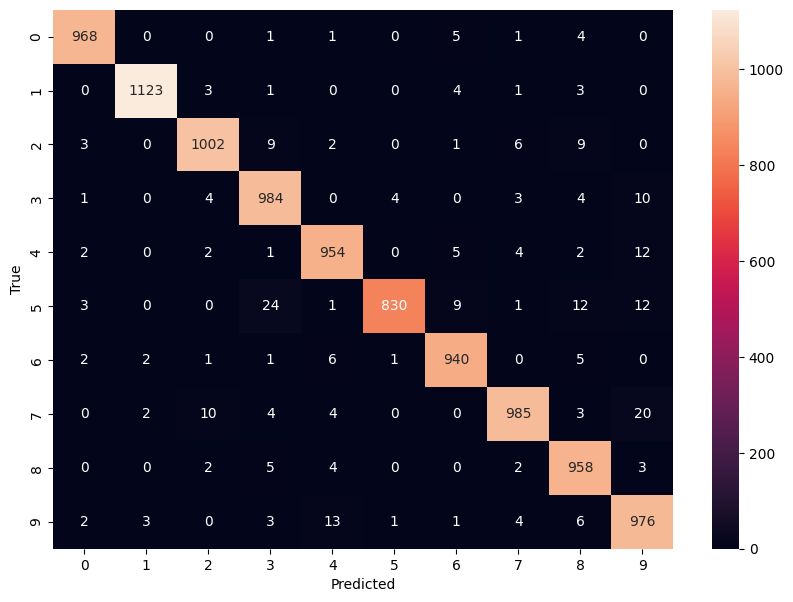

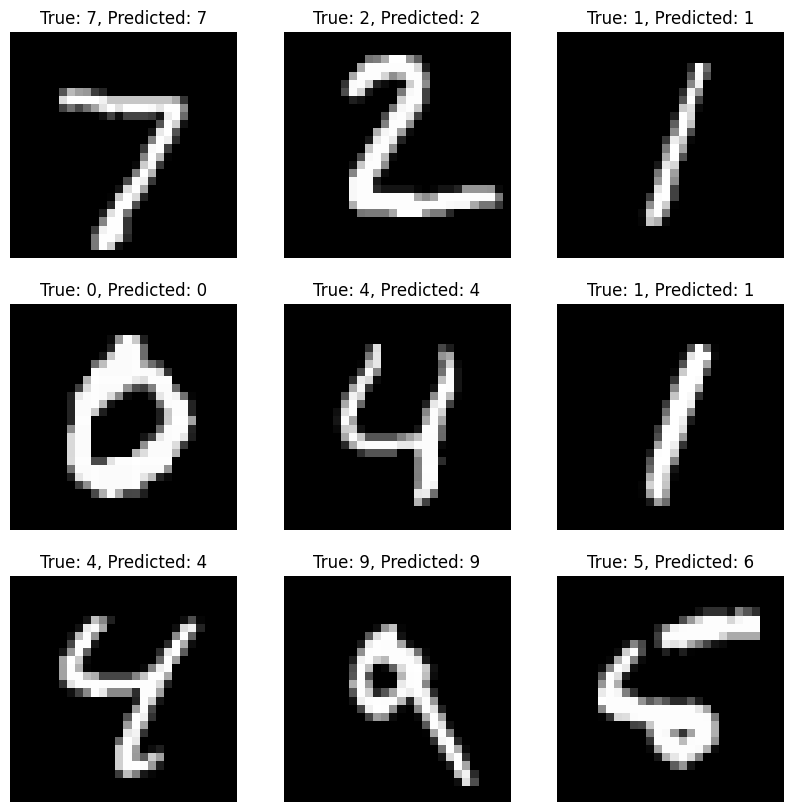

In [28]:
# Предсказания
predictions = loaded_model2.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

# Матрица ошибок
cm = confusion_matrix(y_test, predicted_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Визуализация изображений
def plot_images(images, labels, predictions):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f'True: {labels[i]}, Predicted: {predictions[i]}')
        plt.axis('off')
    plt.show()

plot_images(x_test, y_test, predicted_classes)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


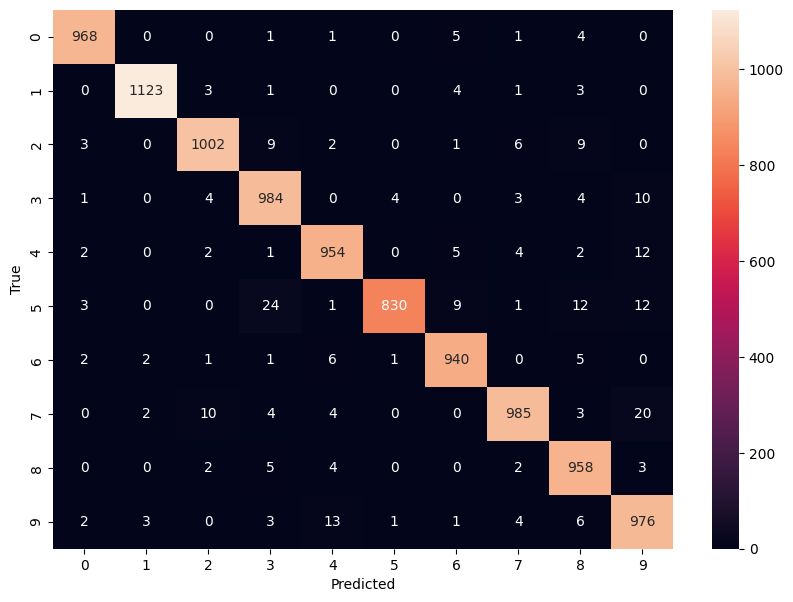

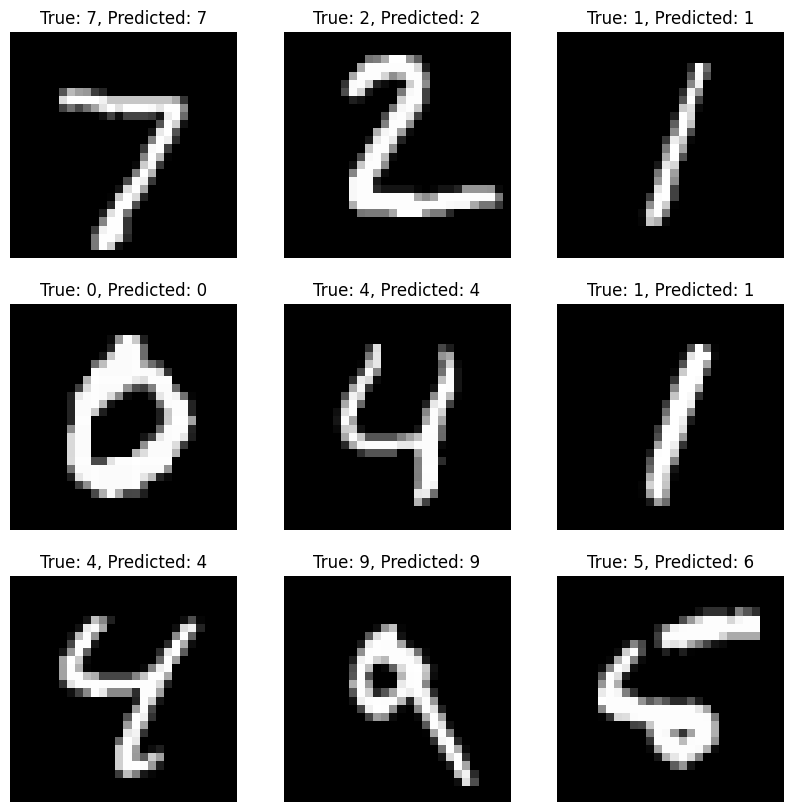

In [29]:
# Предсказания
predictions = loaded_model2.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

# Матрица ошибок
cm = confusion_matrix(y_test, predicted_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Визуализация изображений
def plot_images(images, labels, predictions):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f'True: {labels[i]}, Predicted: {predictions[i]}')
        plt.axis('off')
    plt.show()

plot_images(x_test, y_test, predicted_classes)